# ML on all wavelets (novel DWT)
- This notebook performs ML on features from all wavelets, where the DWT was performed on the individual events
- uses data generated in feature_extraction.ipynb

In [1]:
# feature_extraction extracts features from WTs using all the types of discrete wavelets + no DWT applied

In [1]:
import importlib
import all_funcs
importlib.reload(all_funcs)
from all_funcs import *

In [2]:
y_all_labels = unpickle('all_y_labels.pkl')
y_labels_no1920 = unpickle('data_y_labels_no1920.pkl')



In [3]:
results_all_wavelets_thresh005_coeff2_flat = unpickle("results_all_wavelets_thresh005_coeff2_flat.pkl")
results_all_wavelets_thresh01_coeff2_flat = unpickle("results_all_wavelets_thresh01_coeff2_flat.pkl")
results_all_wavelets_thresh015_coeff2_flat = unpickle("results_all_wavelets_thresh015_coeff2_flat.pkl")
results_all_wavelets_thresh02_coeff2_flat = unpickle("results_all_wavelets_thresh02_coeff2_flat.pkl")
results_all_wavelets_thresh025_coeff2_flat = unpickle("results_all_wavelets_thresh025_coeff2_flat.pkl")
results_all_wavelets_thresh03_coeff2_flat = unpickle("results_all_wavelets_thresh03_coeff2_flat.pkl")
results_all_wavelets_thresh035_coeff2_flat = unpickle("results_all_wavelets_thresh035_coeff2_flat.pkl")
results_all_wavelets_thresh04_coeff2_flat = unpickle("results_all_wavelets_thresh04_coeff2_flat.pkl")
results_all_wavelets_thresh045_coeff2_flat = unpickle("results_all_wavelets_thresh045_coeff2_flat.pkl")
results_all_wavelets_thresh05_coeff2_flat = unpickle("results_all_wavelets_thresh05_coeff2_flat.pkl")


In [14]:
new_df_flat_threshno1920 = prepare_df_for_ML(df_all_wavelets_and_noDWT_features_thresh, no1920=True)

### ML all on all wavelets

In [37]:
from sklearn.base import is_classifier, clone

def ML_all_wavelets_func(df, model):

    results = {}
    results_sd = {}
    
    # Initialize k-fold cross-validation so its the same for each wavelet
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    for column in df.columns:
        # Scale the features
        scaler = RobustScaler()
        
        X = np.array(df[column][0])
        y = y_labels_no1920
        
        X_scaled = scaler.fit_transform(X)

        # Create a pipeline with SMOTE and the specified model
        clf_pipeline = Pipeline([
            ('smote', SMOTE(random_state=42)),
            ('model', clone(model))
        ])

        # Perform k-fold CV
        accuracies = cross_val_score(clf_pipeline, X_scaled, y, cv=kf, scoring='accuracy', n_jobs=-1)  # Use parallel processing

        # Calculate average accuracy
        average_accuracy = np.mean(accuracies)
        sd_accuracy = np.std(accuracies)
        results[column] = average_accuracy
        results_sd[column] = sd_accuracy / np.sqrt(10) # standard error of the mean
    
    return results, results_sd

In [16]:
models = [DecisionTreeClassifier(random_state=42), 
          RandomForestClassifier(random_state=42), 
          XGBClassifier(random_state=42), SVC(random_state=42)]

model_names = ['DecisionTree', 'RandomForest', 'XGBoost', 'SVM']

In [17]:
combined_results_thresh005_coeff2, combined_results_thresh005_coeff2_sd = pd.DataFrame(), pd.DataFrame()
combined_results_thresh01_coeff2, combined_results_thresh01_coeff2_sd = pd.DataFrame(), pd.DataFrame()
combined_results_thresh015_coeff2, combined_results_thresh015_coeff2_sd = pd.DataFrame(), pd.DataFrame()
combined_results_thresh02_coeff2, combined_results_thresh02_coeff2_sd = pd.DataFrame(), pd.DataFrame()
combined_results_thresh025_coeff2, combined_results_thresh025_coeff2_sd = pd.DataFrame(), pd.DataFrame()
combined_results_thresh03_coeff2, combined_results_thresh03_coeff2_sd = pd.DataFrame(), pd.DataFrame()
combined_results_thresh035_coeff2, combined_results_thresh035_coeff2_sd = pd.DataFrame(), pd.DataFrame()
combined_results_thresh04_coeff2, combined_results_thresh04_coeff2_sd = pd.DataFrame(), pd.DataFrame()
combined_results_thresh045_coeff2, combined_results_thresh045_coeff2_sd = pd.DataFrame(), pd.DataFrame()
combined_results_thresh05_coeff2, combined_results_thresh05_coeff2_sd = pd.DataFrame(), pd.DataFrame()


for model, name in zip(models, model_names):
    combined_results_thresh005_coeff2[name], combined_results_thresh005_coeff2_sd[name] = ML_all_wavelets_func(results_all_wavelets_thresh005_coeff2_flat, model)
    combined_results_thresh01_coeff2[name], combined_results_thresh01_coeff2_sd[name] = ML_all_wavelets_func(results_all_wavelets_thresh01_coeff2_flat, model)
    combined_results_thresh015_coeff2[name], combined_results_thresh015_coeff2_sd[name] = ML_all_wavelets_func(results_all_wavelets_thresh015_coeff2_flat, model)
    combined_results_thresh02_coeff2[name], combined_results_thresh02_coeff2_sd[name] = ML_all_wavelets_func(results_all_wavelets_thresh02_coeff2_flat, model)
    combined_results_thresh025_coeff2[name], combined_results_thresh025_coeff2_sd[name] = ML_all_wavelets_func(results_all_wavelets_thresh025_coeff2_flat, model)
    combined_results_thresh03_coeff2[name], combined_results_thresh03_coeff2_sd[name] = ML_all_wavelets_func(results_all_wavelets_thresh03_coeff2_flat, model)
    combined_results_thresh035_coeff2[name], combined_results_thresh035_coeff2_sd[name] = ML_all_wavelets_func(results_all_wavelets_thresh035_coeff2_flat, model)
    combined_results_thresh04_coeff2[name], combined_results_thresh04_coeff2_sd[name] = ML_all_wavelets_func(results_all_wavelets_thresh04_coeff2_flat, model)
    combined_results_thresh045_coeff2[name], combined_results_thresh045_coeff2_sd[name] = ML_all_wavelets_func(results_all_wavelets_thresh045_coeff2_flat, model)
    combined_results_thresh05_coeff2[name], combined_results_thresh05_coeff2_sd[name] = ML_all_wavelets_func(results_all_wavelets_thresh05_coeff2_flat, model)
    



In [20]:
combined_results_thresh01_coeff2["XGBoost"].max()

0.9402417516822228

In [23]:
combined_results_thresh005_coeff2.to_pickle('combined_results_thresh005_coeff2.pkl')
combined_results_thresh005_coeff2_sd.to_pickle('combined_results_thresh005_coeff2_sd.pkl')
combined_results_thresh01_coeff2.to_pickle('combined_results_thresh01_coeff2.pkl')
combined_results_thresh01_coeff2_sd.to_pickle('combined_results_thresh01_coeff2_sd.pkl')
combined_results_thresh015_coeff2.to_pickle('combined_results_thresh015_coeff2.pkl')
combined_results_thresh015_coeff2_sd.to_pickle('combined_results_thresh015_coeff2_sd.pkl')
combined_results_thresh02_coeff2.to_pickle('combined_results_thresh02_coeff2.pkl')
combined_results_thresh02_coeff2_sd.to_pickle('combined_results_thresh02_coeff2_sd.pkl')
combined_results_thresh025_coeff2.to_pickle('combined_results_thresh025_coeff2.pkl')
combined_results_thresh025_coeff2_sd.to_pickle('combined_results_thresh025_coeff2_sd.pkl')
combined_results_thresh03_coeff2.to_pickle('combined_results_thresh03_coeff2.pkl')
combined_results_thresh03_coeff2_sd.to_pickle('combined_results_thresh03_coeff2_sd.pkl')
combined_results_thresh035_coeff2.to_pickle('combined_results_thresh035_coeff2.pkl')
combined_results_thresh035_coeff2_sd.to_pickle('combined_results_thresh035_coeff2_sd.pkl')
combined_results_thresh04_coeff2.to_pickle('combined_results_thresh04_coeff2.pkl')
combined_results_thresh04_coeff2_sd.to_pickle('combined_results_thresh04_coeff2_sd.pkl')
combined_results_thresh045_coeff2.to_pickle('combined_results_thresh045_coeff2.pkl')
combined_results_thresh045_coeff2_sd.to_pickle('combined_results_thresh045_coeff2_sd.pkl')
combined_results_thresh05_coeff2.to_pickle('combined_results_thresh05_coeff2.pkl')
combined_results_thresh05_coeff2_sd.to_pickle('combined_results_thresh05_coeff2_sd.pkl')



In [4]:
# import all files
combined_results_thresh005_coeff2 = unpickle('combined_results_thresh005_coeff2.pkl')
combined_results_thresh005_coeff2_sd = unpickle('combined_results_thresh005_coeff2_sd.pkl')
combined_results_thresh01_coeff2 = unpickle('combined_results_thresh01_coeff2.pkl')
combined_results_thresh01_coeff2_sd = unpickle('combined_results_thresh01_coeff2_sd.pkl')
combined_results_thresh015_coeff2 = unpickle('combined_results_thresh015_coeff2.pkl')
combined_results_thresh015_coeff2_sd = unpickle('combined_results_thresh015_coeff2_sd.pkl')
combined_results_thresh02_coeff2 = unpickle('combined_results_thresh02_coeff2.pkl')
combined_results_thresh02_coeff2_sd = unpickle('combined_results_thresh02_coeff2_sd.pkl')
combined_results_thresh025_coeff2 = unpickle('combined_results_thresh025_coeff2.pkl')
combined_results_thresh025_coeff2_sd = unpickle('combined_results_thresh025_coeff2_sd.pkl')
combined_results_thresh03_coeff2 = unpickle('combined_results_thresh03_coeff2.pkl')
combined_results_thresh03_coeff2_sd = unpickle('combined_results_thresh03_coeff2_sd.pkl')
combined_results_thresh035_coeff2 = unpickle('combined_results_thresh035_coeff2.pkl')
combined_results_thresh035_coeff2_sd = unpickle('combined_results_thresh035_coeff2_sd.pkl')
combined_results_thresh04_coeff2 = unpickle('combined_results_thresh04_coeff2.pkl')
combined_results_thresh04_coeff2_sd = unpickle('combined_results_thresh04_coeff2_sd.pkl')
combined_results_thresh045_coeff2 = unpickle('combined_results_thresh045_coeff2.pkl')
combined_results_thresh045_coeff2_sd = unpickle('combined_results_thresh045_coeff2_sd.pkl')
combined_results_thresh05_coeff2 = unpickle('combined_results_thresh05_coeff2.pkl')
combined_results_thresh05_coeff2_sd = unpickle('combined_results_thresh05_coeff2_sd.pkl')



In [10]:
combined_results_thresh3005 = unpickle("combined_results_rerun_thresh3005.pkl")
combined_results_thresh3005_sd = unpickle("combined_results_thresh3005_sd.pkl")
combined_results_thresh301 = unpickle("combined_results_rerun_thresh301.pkl")
combined_results_thresh301_sd = unpickle("combined_results_thresh301_sd.pkl")
combined_results_thresh3015 = unpickle("combined_results_rerun_thresh3015.pkl")
combined_results_thresh3015_sd = unpickle("combined_results_thresh3015_sd.pkl")
combined_results_thresh302 = unpickle("combined_results_rerun_thresh302.pkl")
combined_results_thresh302_sd = unpickle("combined_results_thresh302_sd.pkl")
combined_results_thresh3025 = unpickle("combined_results_rerun_thresh3025.pkl")
combined_results_thresh3025_sd = unpickle("combined_results_thresh3025_sd.pkl")
combined_results_thresh303 = unpickle("combined_results_rerun_thresh303.pkl")
combined_results_thresh303_sd = unpickle("combined_results_thresh303_sd.pkl")
combined_results_thresh3035 = unpickle("combined_results_rerun_thresh3035.pkl")
combined_results_thresh3035_sd = unpickle("combined_results_thresh3035_sd.pkl")
combined_results_thresh304 = unpickle("combined_results_rerun_thresh304.pkl")
combined_results_thresh304_sd = unpickle("combined_results_thresh304_sd.pkl")
combined_results_thresh3045 = unpickle("combined_results_rerun_thresh3045.pkl")
combined_results_thresh3045_sd = unpickle("combined_results_thresh3045_sd.pkl")
combined_results_thresh305 = unpickle("combined_results_rerun_thresh305.pkl")
combined_results_thresh305_sd = unpickle("combined_results_thresh305_sd.pkl")

In [11]:
max_DT_3 = np.array([combined_results_thresh3005["DecisionTree"]["no_DWT"], combined_results_thresh3005["DecisionTree"].max(), combined_results_thresh301["DecisionTree"].max(), combined_results_thresh3015["DecisionTree"].max(), combined_results_thresh302["DecisionTree"].max(), combined_results_thresh3025["DecisionTree"].max(), combined_results_thresh303["DecisionTree"].max(), combined_results_thresh3035["DecisionTree"].max(), combined_results_thresh304["DecisionTree"].max(), combined_results_thresh3045["DecisionTree"].max(), combined_results_thresh305["DecisionTree"].max()])
max_RF_3 = np.array([combined_results_thresh3005["RandomForest"]["no_DWT"], combined_results_thresh3005["RandomForest"].max(), combined_results_thresh301["RandomForest"].max(), combined_results_thresh3015["RandomForest"].max(), combined_results_thresh302["RandomForest"].max(), combined_results_thresh3025["RandomForest"].max(), combined_results_thresh303["RandomForest"].max(), combined_results_thresh3035["RandomForest"].max(), combined_results_thresh304["RandomForest"].max(), combined_results_thresh3045["RandomForest"].max(), combined_results_thresh305["RandomForest"].max()])
max_XGB_3 = np.array([combined_results_thresh3005["XGBoost"]["no_DWT"], combined_results_thresh3005["XGBoost"].max(), combined_results_thresh301["XGBoost"].max(), combined_results_thresh3015["XGBoost"].max(), combined_results_thresh302["XGBoost"].max(), combined_results_thresh3025["XGBoost"].max(), combined_results_thresh303["XGBoost"].max(), combined_results_thresh3035["XGBoost"].max(), combined_results_thresh304["XGBoost"].max(), combined_results_thresh3045["XGBoost"].max(), combined_results_thresh305["XGBoost"].max()])
max_SVM_3 = np.array([combined_results_thresh3005["SVM"]["no_DWT"], combined_results_thresh3005["SVM"].max(), combined_results_thresh301["SVM"].max(), combined_results_thresh3015["SVM"].max(), combined_results_thresh302["SVM"].max(), combined_results_thresh3025["SVM"].max(), combined_results_thresh303["SVM"].max(), combined_results_thresh3035["SVM"].max(), combined_results_thresh304["SVM"].max(), combined_results_thresh3045["SVM"].max(), combined_results_thresh305["SVM"].max()])

thresholds = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])

no coeff features

In [13]:
best_wavlets_thresh3005 = [combined_results_thresh3005["DecisionTree"].idxmax(), combined_results_thresh3005["RandomForest"].idxmax(), combined_results_thresh3005["XGBoost"].idxmax(), combined_results_thresh3005["SVM"].idxmax()]
best_wavlets_thresh301 = [combined_results_thresh301["DecisionTree"].idxmax(), combined_results_thresh301["RandomForest"].idxmax(), combined_results_thresh301["XGBoost"].idxmax(), combined_results_thresh301["SVM"].idxmax()]
best_wavlets_thresh3015 = [combined_results_thresh3015["DecisionTree"].idxmax(), combined_results_thresh3015["RandomForest"].idxmax(), combined_results_thresh3015["XGBoost"].idxmax(), combined_results_thresh3015["SVM"].idxmax()]
best_wavlets_thresh302 = [combined_results_thresh302["DecisionTree"].idxmax(), combined_results_thresh302["RandomForest"].idxmax(), combined_results_thresh302["XGBoost"].idxmax(), combined_results_thresh302["SVM"].idxmax()]
best_wavlets_thresh3025 = [combined_results_thresh3025["DecisionTree"].idxmax(), combined_results_thresh3025["RandomForest"].idxmax(), combined_results_thresh3025["XGBoost"].idxmax(), combined_results_thresh3025["SVM"].idxmax()]
best_wavlets_thresh303 = [combined_results_thresh303["DecisionTree"].idxmax(), combined_results_thresh303["RandomForest"].idxmax(), combined_results_thresh303["XGBoost"].idxmax(), combined_results_thresh303["SVM"].idxmax()]
best_wavlets_thresh3035 = [combined_results_thresh3035["DecisionTree"].idxmax(), combined_results_thresh3035["RandomForest"].idxmax(), combined_results_thresh3035["XGBoost"].idxmax(), combined_results_thresh3035["SVM"].idxmax()]
best_wavlets_thresh304 = [combined_results_thresh304["DecisionTree"].idxmax(), combined_results_thresh304["RandomForest"].idxmax(), combined_results_thresh304["XGBoost"].idxmax(), combined_results_thresh304["SVM"].idxmax()]
best_wavlets_thresh3045 = [combined_results_thresh3045["DecisionTree"].idxmax(), combined_results_thresh3045["RandomForest"].idxmax(), combined_results_thresh3045["XGBoost"].idxmax(), combined_results_thresh3045["SVM"].idxmax()]
best_wavlets_thresh305 = [combined_results_thresh305["DecisionTree"].idxmax(), combined_results_thresh305["RandomForest"].idxmax(), combined_results_thresh305["XGBoost"].idxmax(), combined_results_thresh305["SVM"].idxmax()]


In [14]:
errors_DT_3 = np.array([combined_results_thresh3005_sd["DecisionTree"]["no_DWT"], combined_results_thresh3005_sd["DecisionTree"][best_wavlets_thresh3005[0]], combined_results_thresh301_sd["DecisionTree"][best_wavlets_thresh301[0]], combined_results_thresh3015_sd["DecisionTree"][best_wavlets_thresh3015[0]], combined_results_thresh302_sd["DecisionTree"][best_wavlets_thresh302[0]], combined_results_thresh3025_sd["DecisionTree"][best_wavlets_thresh3025[0]], combined_results_thresh303_sd["DecisionTree"][best_wavlets_thresh303[0]], combined_results_thresh3035_sd["DecisionTree"][best_wavlets_thresh3035[0]], combined_results_thresh304_sd["DecisionTree"][best_wavlets_thresh304[0]], combined_results_thresh3045_sd["DecisionTree"][best_wavlets_thresh3045[0]], combined_results_thresh305_sd["DecisionTree"][best_wavlets_thresh305[0]]])
errors_RF_3 = np.array([combined_results_thresh3005_sd["RandomForest"]["no_DWT"], combined_results_thresh3005_sd["RandomForest"][best_wavlets_thresh3005[1]], combined_results_thresh301_sd["RandomForest"][best_wavlets_thresh301[1]], combined_results_thresh3015_sd["RandomForest"][best_wavlets_thresh3015[1]], combined_results_thresh302_sd["RandomForest"][best_wavlets_thresh302[1]], combined_results_thresh3025_sd["RandomForest"][best_wavlets_thresh3025[1]], combined_results_thresh303_sd["RandomForest"][best_wavlets_thresh303[1]], combined_results_thresh3035_sd["RandomForest"][best_wavlets_thresh3035[1]], combined_results_thresh304_sd["RandomForest"][best_wavlets_thresh304[1]], combined_results_thresh3045_sd["RandomForest"][best_wavlets_thresh3045[1]], combined_results_thresh305_sd["RandomForest"][best_wavlets_thresh305[1]]])
errors_XGB_3 = np.array([combined_results_thresh3005_sd["XGBoost"]["no_DWT"], combined_results_thresh3005_sd["XGBoost"][best_wavlets_thresh3005[2]], combined_results_thresh301_sd["XGBoost"][best_wavlets_thresh301[2]], combined_results_thresh3015_sd["XGBoost"][best_wavlets_thresh3015[2]], combined_results_thresh302_sd["XGBoost"][best_wavlets_thresh302[2]], combined_results_thresh3025_sd["XGBoost"][best_wavlets_thresh3025[2]], combined_results_thresh303_sd["XGBoost"][best_wavlets_thresh303[2]], combined_results_thresh3035_sd["XGBoost"][best_wavlets_thresh3035[2]], combined_results_thresh304_sd["XGBoost"][best_wavlets_thresh304[2]], combined_results_thresh3045_sd["XGBoost"][best_wavlets_thresh3045[2]], combined_results_thresh305_sd["XGBoost"][best_wavlets_thresh305[2]]])
errors_SVM_3 = np.array([combined_results_thresh3005_sd["SVM"]["no_DWT"], combined_results_thresh3005_sd["SVM"][best_wavlets_thresh3005[3]], combined_results_thresh301_sd["SVM"][best_wavlets_thresh301[3]], combined_results_thresh3015_sd["SVM"][best_wavlets_thresh3015[3]], combined_results_thresh302_sd["SVM"][best_wavlets_thresh302[3]], combined_results_thresh3025_sd["SVM"][best_wavlets_thresh3025[3]], combined_results_thresh303_sd["SVM"][best_wavlets_thresh303[3]], combined_results_thresh3035_sd["SVM"][best_wavlets_thresh3035[3]], combined_results_thresh304_sd["SVM"][best_wavlets_thresh304[3]], combined_results_thresh3045_sd["SVM"][best_wavlets_thresh3045[3]], combined_results_thresh305_sd["SVM"][best_wavlets_thresh305[3]]])

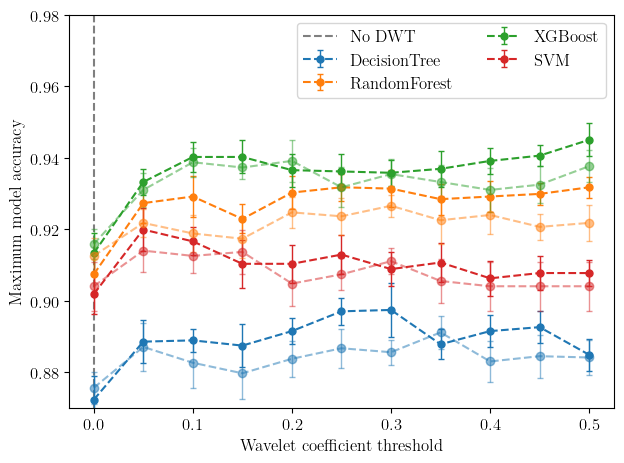

In [16]:
# plotting with error bars
plt.vlines(0, 0.8, 1, colors='k', linestyles='--', label='No DWT', alpha = 0.5)

plt.errorbar(thresholds, max_DT_coeff2, yerr=errors_DT, label="DecisionTree", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1, c = "tab:blue")
plt.errorbar(thresholds, max_RF_coeff2, yerr=errors_RF, label="RandomForest", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1, c = "tab:orange")
plt.errorbar(thresholds, max_XGB_coeff2, yerr=errors_XGB, label="XGBoost", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1, c = "tab:green")
plt.errorbar(thresholds, max_SVM_coeff2, yerr=errors_SVM, label="SVM", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1, c = "tab:red")

# no coeff features
plt.errorbar(thresholds, max_DT_3, yerr=errors_DT_3, marker='o', linestyle='--', alpha = 0.5, capsize=2, elinewidth=1, c = "tab:blue")
plt.errorbar(thresholds, max_RF_3, yerr=errors_RF_3, marker='o', linestyle='--', alpha = 0.5, capsize=2, elinewidth=1, c = "tab:orange")
plt.errorbar(thresholds, max_XGB_3, yerr=errors_XGB_3, marker='o', linestyle='--', alpha = 0.5, capsize=2, elinewidth=1, c = "tab:green")
plt.errorbar(thresholds, max_SVM_3, yerr=errors_SVM_3, marker='o', linestyle='--', alpha = 0.5, capsize=2, elinewidth=1, c = "tab:red")

plt.legend(loc = "upper right", ncol = 2)
plt.xlabel("Wavelet coefficient threshold")
plt.ylabel("Maximum model accuracy")
plt.ylim(0.87, 0.98)
plt.tight_layout()
#plt.savefig('MSci_python_images/event_DWT_accuracy_comparison_coeffs_errorbars.png', dpi=300)
plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/event_DWT_accuracy_comparison_coeffs_errorbars.svg")

plt.show()

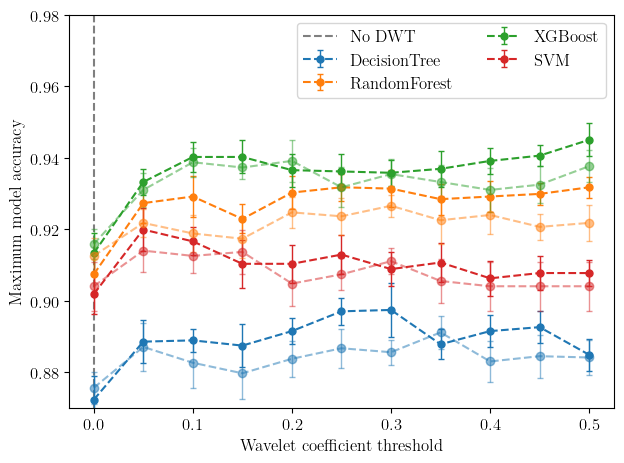

In [432]:
# plotting with error bars
plt.vlines(0, 0.8, 1, colors='k', linestyles='--', label='No DWT', alpha = 0.5)

plt.errorbar(thresholds, max_DT_coeff2, yerr=errors_DT, label="DecisionTree", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1, c = "tab:blue")
plt.errorbar(thresholds, max_RF_coeff2, yerr=errors_RF, label="RandomForest", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1, c = "tab:orange")
plt.errorbar(thresholds, max_XGB_coeff2, yerr=errors_XGB, label="XGBoost", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1, c = "tab:green")
plt.errorbar(thresholds, max_SVM_coeff2, yerr=errors_SVM, label="SVM", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1, c = "tab:red")

# no coeff features
plt.errorbar(thresholds, max_DT_3, yerr=errors_DT_3, marker='o', linestyle='--', alpha = 0.5, capsize=2, elinewidth=1, c = "tab:blue")
plt.errorbar(thresholds, max_RF_3, yerr=errors_RF_3, marker='o', linestyle='--', alpha = 0.5, capsize=2, elinewidth=1, c = "tab:orange")
plt.errorbar(thresholds, max_XGB_3, yerr=errors_XGB_3, marker='o', linestyle='--', alpha = 0.5, capsize=2, elinewidth=1, c = "tab:green")
plt.errorbar(thresholds, max_SVM_3, yerr=errors_SVM_3, marker='o', linestyle='--', alpha = 0.5, capsize=2, elinewidth=1, c = "tab:red")

plt.legend(loc = "upper right", ncol = 2)
plt.xlabel("Wavelet coefficient threshold")
plt.ylabel("Maximum model accuracy")
plt.ylim(0.87, 0.98)
plt.tight_layout()
#plt.savefig('MSci_python_images/event_DWT_accuracy_comparison_coeffs_errorbars.png', dpi=300)
plt.show()


python(49555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


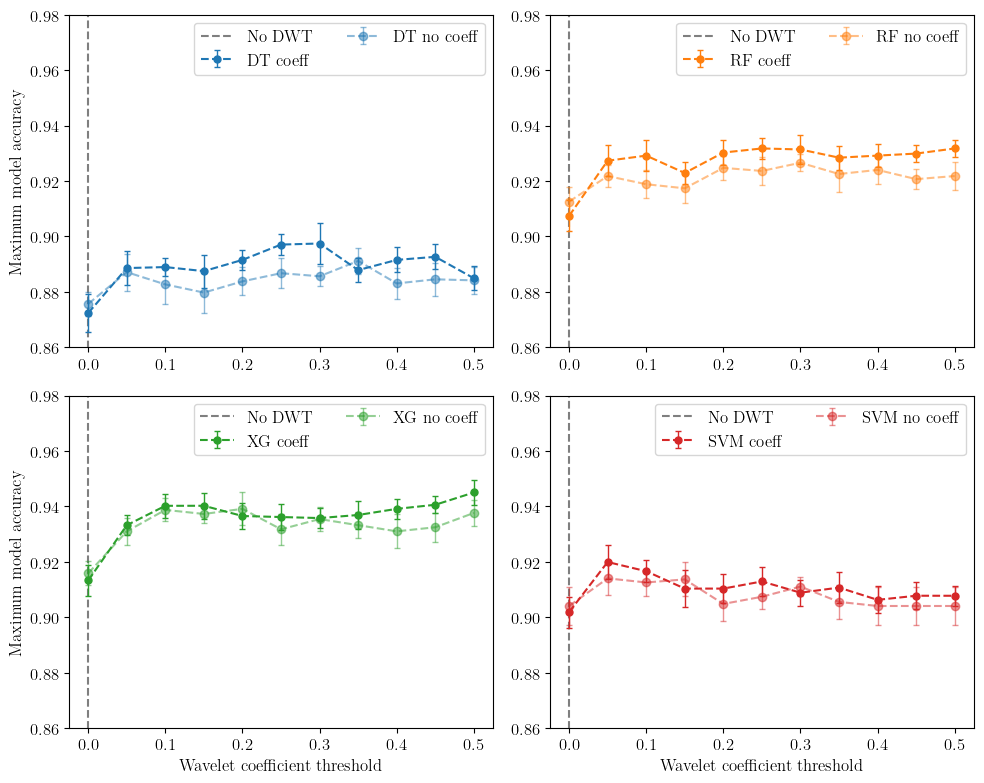

In [45]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Creates a 2x2 grid of subplots

models = ['DT', 'RF', 'XG', 'SVM']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
data_coeff = [max_DT_coeff2, max_RF_coeff2, max_XGB_coeff2, max_SVM_coeff2]
errors_coeff = [errors_DT, errors_RF, errors_XGB, errors_SVM]
data_no_coeff = [max_DT_3, max_RF_3, max_XGB_3, max_SVM_3]
errors_no_coeff = [errors_DT_3, errors_RF_3, errors_XGB_3, errors_SVM_3]

#y_lims = [[0.87, 0.9], ]

for ax, model, color, data_c, error_c, data_nc, error_nc in zip(axs.flatten(), models, colors, data_coeff, errors_coeff, data_no_coeff, errors_no_coeff):
    ax.vlines(0, 0.8, 1, colors='k', linestyles='--', label='No DWT', alpha=0.5)
    ax.errorbar(thresholds, data_c, yerr=error_c, label=f"{model} coeff", marker='o', markersize=5, linestyle='--', capsize=2, elinewidth=1, color=color)
    ax.errorbar(thresholds, data_nc, yerr=error_nc, label=f"{model} no coeff", marker='o', linestyle='--', alpha=0.5, capsize=2, elinewidth=1, color=color)
    if model == 'DT' or model == 'XG':
        ax.set_ylabel("Maximum model accuracy")
    if model == "XG" or model == "SVM":
        ax.set_xlabel("Wavelet coefficient threshold")
    ax.legend(loc="upper right", ncol=2)
    #ax.set_title(model)
    ax.set_ylim(0.86, 0.98)

plt.tight_layout()
#plt.savefig('MSci_python_images/event_DWT_accuracy_comparison_coeffs_errorbars_subplots.png', dpi=300)
plt.show()



In [6]:
max_DT_coeff2 = np.array([combined_results_thresh005_coeff2["DecisionTree"]["no_DWT"], combined_results_thresh005_coeff2["DecisionTree"].max(), combined_results_thresh01_coeff2["DecisionTree"].max(), combined_results_thresh015_coeff2["DecisionTree"].max(), combined_results_thresh02_coeff2["DecisionTree"].max(), combined_results_thresh025_coeff2["DecisionTree"].max(), combined_results_thresh03_coeff2["DecisionTree"].max(), combined_results_thresh035_coeff2["DecisionTree"].max(), combined_results_thresh04_coeff2["DecisionTree"].max(), combined_results_thresh045_coeff2["DecisionTree"].max(), combined_results_thresh05_coeff2["DecisionTree"].max()])
max_RF_coeff2 = np.array([combined_results_thresh005_coeff2["RandomForest"]["no_DWT"], combined_results_thresh005_coeff2["RandomForest"].max(), combined_results_thresh01_coeff2["RandomForest"].max(), combined_results_thresh015_coeff2["RandomForest"].max(), combined_results_thresh02_coeff2["RandomForest"].max(), combined_results_thresh025_coeff2["RandomForest"].max(), combined_results_thresh03_coeff2["RandomForest"].max(), combined_results_thresh035_coeff2["RandomForest"].max(), combined_results_thresh04_coeff2["RandomForest"].max(), combined_results_thresh045_coeff2["RandomForest"].max(), combined_results_thresh05_coeff2["RandomForest"].max()])
max_XGB_coeff2 = np.array([combined_results_thresh005_coeff2["XGBoost"]["no_DWT"], combined_results_thresh005_coeff2["XGBoost"].max(), combined_results_thresh01_coeff2["XGBoost"].max(), combined_results_thresh015_coeff2["XGBoost"].max(), combined_results_thresh02_coeff2["XGBoost"].max(), combined_results_thresh025_coeff2["XGBoost"].max(), combined_results_thresh03_coeff2["XGBoost"].max(), combined_results_thresh035_coeff2["XGBoost"].max(), combined_results_thresh04_coeff2["XGBoost"].max(), combined_results_thresh045_coeff2["XGBoost"].max(), combined_results_thresh05_coeff2["XGBoost"].max()])
max_SVM_coeff2 = np.array([combined_results_thresh005_coeff2["SVM"]["no_DWT"], combined_results_thresh005_coeff2["SVM"].max(), combined_results_thresh01_coeff2["SVM"].max(), combined_results_thresh015_coeff2["SVM"].max(), combined_results_thresh02_coeff2["SVM"].max(), combined_results_thresh025_coeff2["SVM"].max(), combined_results_thresh03_coeff2["SVM"].max(), combined_results_thresh035_coeff2["SVM"].max(), combined_results_thresh04_coeff2["SVM"].max(), combined_results_thresh045_coeff2["SVM"].max(), combined_results_thresh05_coeff2["SVM"].max()])

thresholds = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])

In [7]:
best_wavlets_005_coeff2 = [combined_results_thresh005_coeff2["DecisionTree"].idxmax(), combined_results_thresh005_coeff2["RandomForest"].idxmax(), combined_results_thresh005_coeff2["XGBoost"].idxmax(), combined_results_thresh005_coeff2["SVM"].idxmax()]
best_wavlets_01_coeff2 = [combined_results_thresh01_coeff2["DecisionTree"].idxmax(), combined_results_thresh01_coeff2["RandomForest"].idxmax(), combined_results_thresh01_coeff2["XGBoost"].idxmax(), combined_results_thresh01_coeff2["SVM"].idxmax()]
best_wavlets_015_coeff2 = [combined_results_thresh015_coeff2["DecisionTree"].idxmax(), combined_results_thresh015_coeff2["RandomForest"].idxmax(), combined_results_thresh015_coeff2["XGBoost"].idxmax(), combined_results_thresh015_coeff2["SVM"].idxmax()]
best_wavlets_02_coeff2 = [combined_results_thresh02_coeff2["DecisionTree"].idxmax(), combined_results_thresh02_coeff2["RandomForest"].idxmax(), combined_results_thresh02_coeff2["XGBoost"].idxmax(), combined_results_thresh02_coeff2["SVM"].idxmax()]
best_wavlets_025_coeff2 = [combined_results_thresh025_coeff2["DecisionTree"].idxmax(), combined_results_thresh025_coeff2["RandomForest"].idxmax(), combined_results_thresh025_coeff2["XGBoost"].idxmax(), combined_results_thresh025_coeff2["SVM"].idxmax()]
best_wavlets_03_coeff2 = [combined_results_thresh03_coeff2["DecisionTree"].idxmax(), combined_results_thresh03_coeff2["RandomForest"].idxmax(), combined_results_thresh03_coeff2["XGBoost"].idxmax(), combined_results_thresh03_coeff2["SVM"].idxmax()]
best_wavlets_035_coeff2 = [combined_results_thresh035_coeff2["DecisionTree"].idxmax(), combined_results_thresh035_coeff2["RandomForest"].idxmax(), combined_results_thresh035_coeff2["XGBoost"].idxmax(), combined_results_thresh035_coeff2["SVM"].idxmax()]
best_wavlets_04_coeff2 = [combined_results_thresh04_coeff2["DecisionTree"].idxmax(), combined_results_thresh04_coeff2["RandomForest"].idxmax(), combined_results_thresh04_coeff2["XGBoost"].idxmax(), combined_results_thresh04_coeff2["SVM"].idxmax()]
best_wavlets_045_coeff2 = [combined_results_thresh045_coeff2["DecisionTree"].idxmax(), combined_results_thresh045_coeff2["RandomForest"].idxmax(), combined_results_thresh045_coeff2["XGBoost"].idxmax(), combined_results_thresh045_coeff2["SVM"].idxmax()]
best_wavlets_05_coeff2 = [combined_results_thresh05_coeff2["DecisionTree"].idxmax(), combined_results_thresh05_coeff2["RandomForest"].idxmax(), combined_results_thresh05_coeff2["XGBoost"].idxmax(), combined_results_thresh05_coeff2["SVM"].idxmax()]


In [8]:
errors_DT = [combined_results_thresh005_coeff2_sd["DecisionTree"]["no_DWT"], combined_results_thresh005_coeff2_sd["DecisionTree"][best_wavlets_005_coeff2[0]], combined_results_thresh01_coeff2_sd["DecisionTree"][best_wavlets_01_coeff2[0]], combined_results_thresh015_coeff2_sd["DecisionTree"][best_wavlets_015_coeff2[0]], combined_results_thresh02_coeff2_sd["DecisionTree"][best_wavlets_02_coeff2[0]], combined_results_thresh025_coeff2_sd["DecisionTree"][best_wavlets_025_coeff2[0]], combined_results_thresh03_coeff2_sd["DecisionTree"][best_wavlets_03_coeff2[0]], combined_results_thresh035_coeff2_sd["DecisionTree"][best_wavlets_035_coeff2[0]], combined_results_thresh04_coeff2_sd["DecisionTree"][best_wavlets_04_coeff2[0]], combined_results_thresh045_coeff2_sd["DecisionTree"][best_wavlets_045_coeff2[0]], combined_results_thresh05_coeff2_sd["DecisionTree"][best_wavlets_05_coeff2[0]]]
errors_RF = [combined_results_thresh005_coeff2_sd["RandomForest"]["no_DWT"], combined_results_thresh005_coeff2_sd["RandomForest"][best_wavlets_005_coeff2[1]], combined_results_thresh01_coeff2_sd["RandomForest"][best_wavlets_01_coeff2[1]], combined_results_thresh015_coeff2_sd["RandomForest"][best_wavlets_015_coeff2[1]], combined_results_thresh02_coeff2_sd["RandomForest"][best_wavlets_02_coeff2[1]], combined_results_thresh025_coeff2_sd["RandomForest"][best_wavlets_025_coeff2[1]], combined_results_thresh03_coeff2_sd["RandomForest"][best_wavlets_03_coeff2[1]], combined_results_thresh035_coeff2_sd["RandomForest"][best_wavlets_035_coeff2[1]], combined_results_thresh04_coeff2_sd["RandomForest"][best_wavlets_04_coeff2[1]], combined_results_thresh045_coeff2_sd["RandomForest"][best_wavlets_045_coeff2[1]], combined_results_thresh05_coeff2_sd["RandomForest"][best_wavlets_05_coeff2[1]]]
errors_XGB = [combined_results_thresh005_coeff2_sd["XGBoost"]["no_DWT"], combined_results_thresh005_coeff2_sd["XGBoost"][best_wavlets_005_coeff2[2]], combined_results_thresh01_coeff2_sd["XGBoost"][best_wavlets_01_coeff2[2]], combined_results_thresh015_coeff2_sd["XGBoost"][best_wavlets_015_coeff2[2]], combined_results_thresh02_coeff2_sd["XGBoost"][best_wavlets_02_coeff2[2]], combined_results_thresh025_coeff2_sd["XGBoost"][best_wavlets_025_coeff2[2]], combined_results_thresh03_coeff2_sd["XGBoost"][best_wavlets_03_coeff2[2]], combined_results_thresh035_coeff2_sd["XGBoost"][best_wavlets_035_coeff2[2]], combined_results_thresh04_coeff2_sd["XGBoost"][best_wavlets_04_coeff2[2]], combined_results_thresh045_coeff2_sd["XGBoost"][best_wavlets_045_coeff2[2]], combined_results_thresh05_coeff2_sd["XGBoost"][best_wavlets_05_coeff2[2]]]
errors_SVM = [combined_results_thresh005_coeff2_sd["SVM"]["no_DWT"], combined_results_thresh005_coeff2_sd["SVM"][best_wavlets_005_coeff2[3]], combined_results_thresh01_coeff2_sd["SVM"][best_wavlets_01_coeff2[3]], combined_results_thresh015_coeff2_sd["SVM"][best_wavlets_015_coeff2[3]], combined_results_thresh02_coeff2_sd["SVM"][best_wavlets_02_coeff2[3]], combined_results_thresh025_coeff2_sd["SVM"][best_wavlets_025_coeff2[3]], combined_results_thresh03_coeff2_sd["SVM"][best_wavlets_03_coeff2[3]], combined_results_thresh035_coeff2_sd["SVM"][best_wavlets_035_coeff2[3]], combined_results_thresh04_coeff2_sd["SVM"][best_wavlets_04_coeff2[3]], combined_results_thresh045_coeff2_sd["SVM"][best_wavlets_045_coeff2[3]], combined_results_thresh05_coeff2_sd["SVM"][best_wavlets_05_coeff2[3]]]


In [11]:
max_XGB_coeff2[-1], errors_XGB[-1], max_RF_coeff2[-1], errors_RF[-1]

(0.9450428695463426,
 0.0046455446533390935,
 0.9317628065986543,
 0.0029547804355384353)

In [12]:
mean2 = max_XGB_coeff2[-1]  # mean accuracy of group 1
std2 = errors_XGB[-1]   # standard deviation of group 1
n1 = 10       # number of observations in group 1

# Data for Group 2
mean1 = max_RF_coeff2[-1]  # mean accuracy of group 2
std1 = errors_RF[-1]   # standard deviation of group 2
n2 = 10       # number of observations in group 2

# Compute the standard error of the mean difference
sem1 = std1 / (n1 ** 0.5)
sem2 = std2 / (n2 ** 0.5)
sed = (sem1**2 + sem2**2) ** 0.5

# Compute the t-statistic
t_stat = (mean1 - mean2) / sed

# Compute degrees of freedom for two independent samples
df = n1 + n2 - 2

# Compute the p-value
p_value = stats.t.cdf(t_stat, df) * 2  # multiply by 2 for a two-tailed test

# Output results
print(f'T-statistic: {t_stat}')
print(f'Degrees of freedom: {df}')
print(f'P-value: {p_value}')

T-statistic: -7.627710126405331
Degrees of freedom: 18
P-value: 4.798331671671959e-07


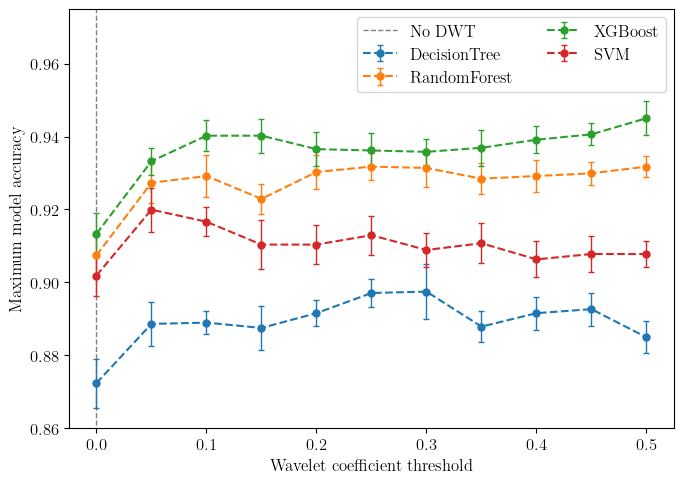

In [8]:
# error bars
plt.figure(figsize=(7, 5))
thresholds = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])

plt.vlines(0, 0.8, 1, colors='k', linestyles='--', linewidth = 1, label='No DWT', alpha=0.5)

plt.errorbar(thresholds, max_DT_coeff2, yerr=errors_DT, label="DecisionTree", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1)
plt.errorbar(thresholds, max_RF_coeff2, yerr=errors_RF, label="RandomForest", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1)
plt.errorbar(thresholds, max_XGB_coeff2, yerr=errors_XGB, label="XGBoost", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1)
plt.errorbar(thresholds, max_SVM_coeff2, yerr=errors_SVM, label="SVM", marker='o', markersize = 5, linestyle='--', capsize=2, elinewidth=1)

plt.ylim(0.86, 0.975)

plt.legend(loc = 'upper right', ncol = 2)
plt.xlabel("Wavelet coefficient threshold")
plt.ylabel("Maximum model accuracy")
plt.tight_layout()
#plt.savefig('MSci_python_images/event_DWT_max_accuracy_plot_errorbars.png', dpi=300)
plt.show()

In [12]:
def heatmap_accuracy_plot(results, thresh, filename = None, figs_size = None):
    
    if figs_size is not None:
        plt.figure(figsize=(figs_size[0], figs_size[1]))
    else:
        plt.figure(figsize=(5, 20))
    sns.heatmap(results*100, annot=True, cmap='Greens', cbar=True, cbar_kws={'shrink': 0.3}, fmt=".1f")

    plt.gcf().axes[-1].set_ylabel('Mean accuracy ($\%$)', size=16)
    plt.xlabel('Model', fontsize = 16)
    plt.ylabel('Wavelet', fontsize = 16)
    plt.title(f"threshold = {thresh}")
    plt.tight_layout()
    if filename is not None:
        plt.savefig("MSci_python_images/" + filename + ".png", dpi=500)
    plt.show()

In [14]:
def heatmap_accuracy_plot_many(all_results, figs_size=None, filename=None):
    # Determine the number of subplots based on the number of results
    n = len(all_results)
    
    # Setup figure size
    if figs_size is not None:
        fig, axs = plt.subplots(1, n, figsize=(figs_size[0], figs_size[1]*n))
    else:
        fig, axs = plt.subplots(1, n, figsize=(5*n, 20))
    
    for i, (results, thresh) in enumerate(all_results):
        # Adjust for when there's only one set of results
        if n == 1:
            ax = axs
            ax.set_ylabel('Wavelet', fontsize=16)
        else:
            ax = axs[i]
            
        sns.heatmap(results*100, annot=True, cmap='Greens', cbar=i == n-1, 
                    cbar_kws={'shrink': 0.3}, fmt=".1f", ax=ax)
        
        # Set the colorbar label only for the last plot
        if i == n-1:
            plt.gcf().axes[-1].set_ylabel('Mean accuracy ($\%$)', size=16)
        
        ax.set_xlabel('Model', fontsize=16)
        
        ax.set_title(f"Threshold = {thresh}", fontsize=18)
    
    plt.tight_layout()
    
    if filename is not None:
        plt.savefig("MSci_python_images/" + filename + ".png", dpi=500)
    
    plt.show()

In [75]:
def heatmap_accuracy_plot_many(all_results, order, figs_size=None, filename=None):
    n = len(all_results)  # Number of subplots
    base_labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)', 'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)', 'z)']

    # Adjust the slice of base_labels based on 'order' to generate the correct set of labels
    if order == 1:
        labels = base_labels[:n]
    elif order == 2:
        labels = base_labels[n:2*n]
    elif order == 3:
        labels = base_labels[8:10]
    else:
        # Fallback or default case to avoid UnboundLocalError
        labels = base_labels[:n]
        
    if figs_size is not None:
        fig, axs = plt.subplots(1, n, figsize=(figs_size[0]*n, figs_size[1]), 
                                gridspec_kw={'width_ratios': [results.shape[1] for results, _ in all_results]})
    else:
        # Default figure size, dynamically adjusting width
        total_width_per_subplot = 5  # You can adjust this based on your needs
        fig, axs = plt.subplots(1, n, figsize=(total_width_per_subplot*n, 20), 
                                gridspec_kw={'width_ratios': [results.shape[1] for results, _ in all_results]})

    for i, ((results, thresh), label) in enumerate(zip(all_results, labels)):
        ax = axs[i] if n > 1 else axs
        
        # Create the heatmap
        sns.heatmap(results*100, annot=True, cmap='Greens', cbar=False, fmt=".1f", ax=ax)
        ax.set_title(f"Threshold = {thresh}", fontsize=18)
        if i == 0:
            ax.set_ylabel('Wavelet', fontsize=16)
        ax.text(-0.15, 1.02, label, transform=ax.transAxes, size=20, weight='bold')

    fig.text(0.5, 0.01, 'Model', ha='center', fontsize=16)

    # Adjust subplot parameters to give specified padding
    plt.tight_layout(pad=3)

    # Manually add the colorbar to the figure
    sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=np.min(all_results[0][0]*100), vmax=np.max(all_results[0][0]*100)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.02)
    cbar.set_label('Mean accuracy ($\%$)', size=16)
    #plt.subplots_adjust(left=0.05, top=0.95)

    if filename is not None:
        plt.savefig("MSci_python_images/" + filename + ".png", dpi=500)
    
    plt.show()



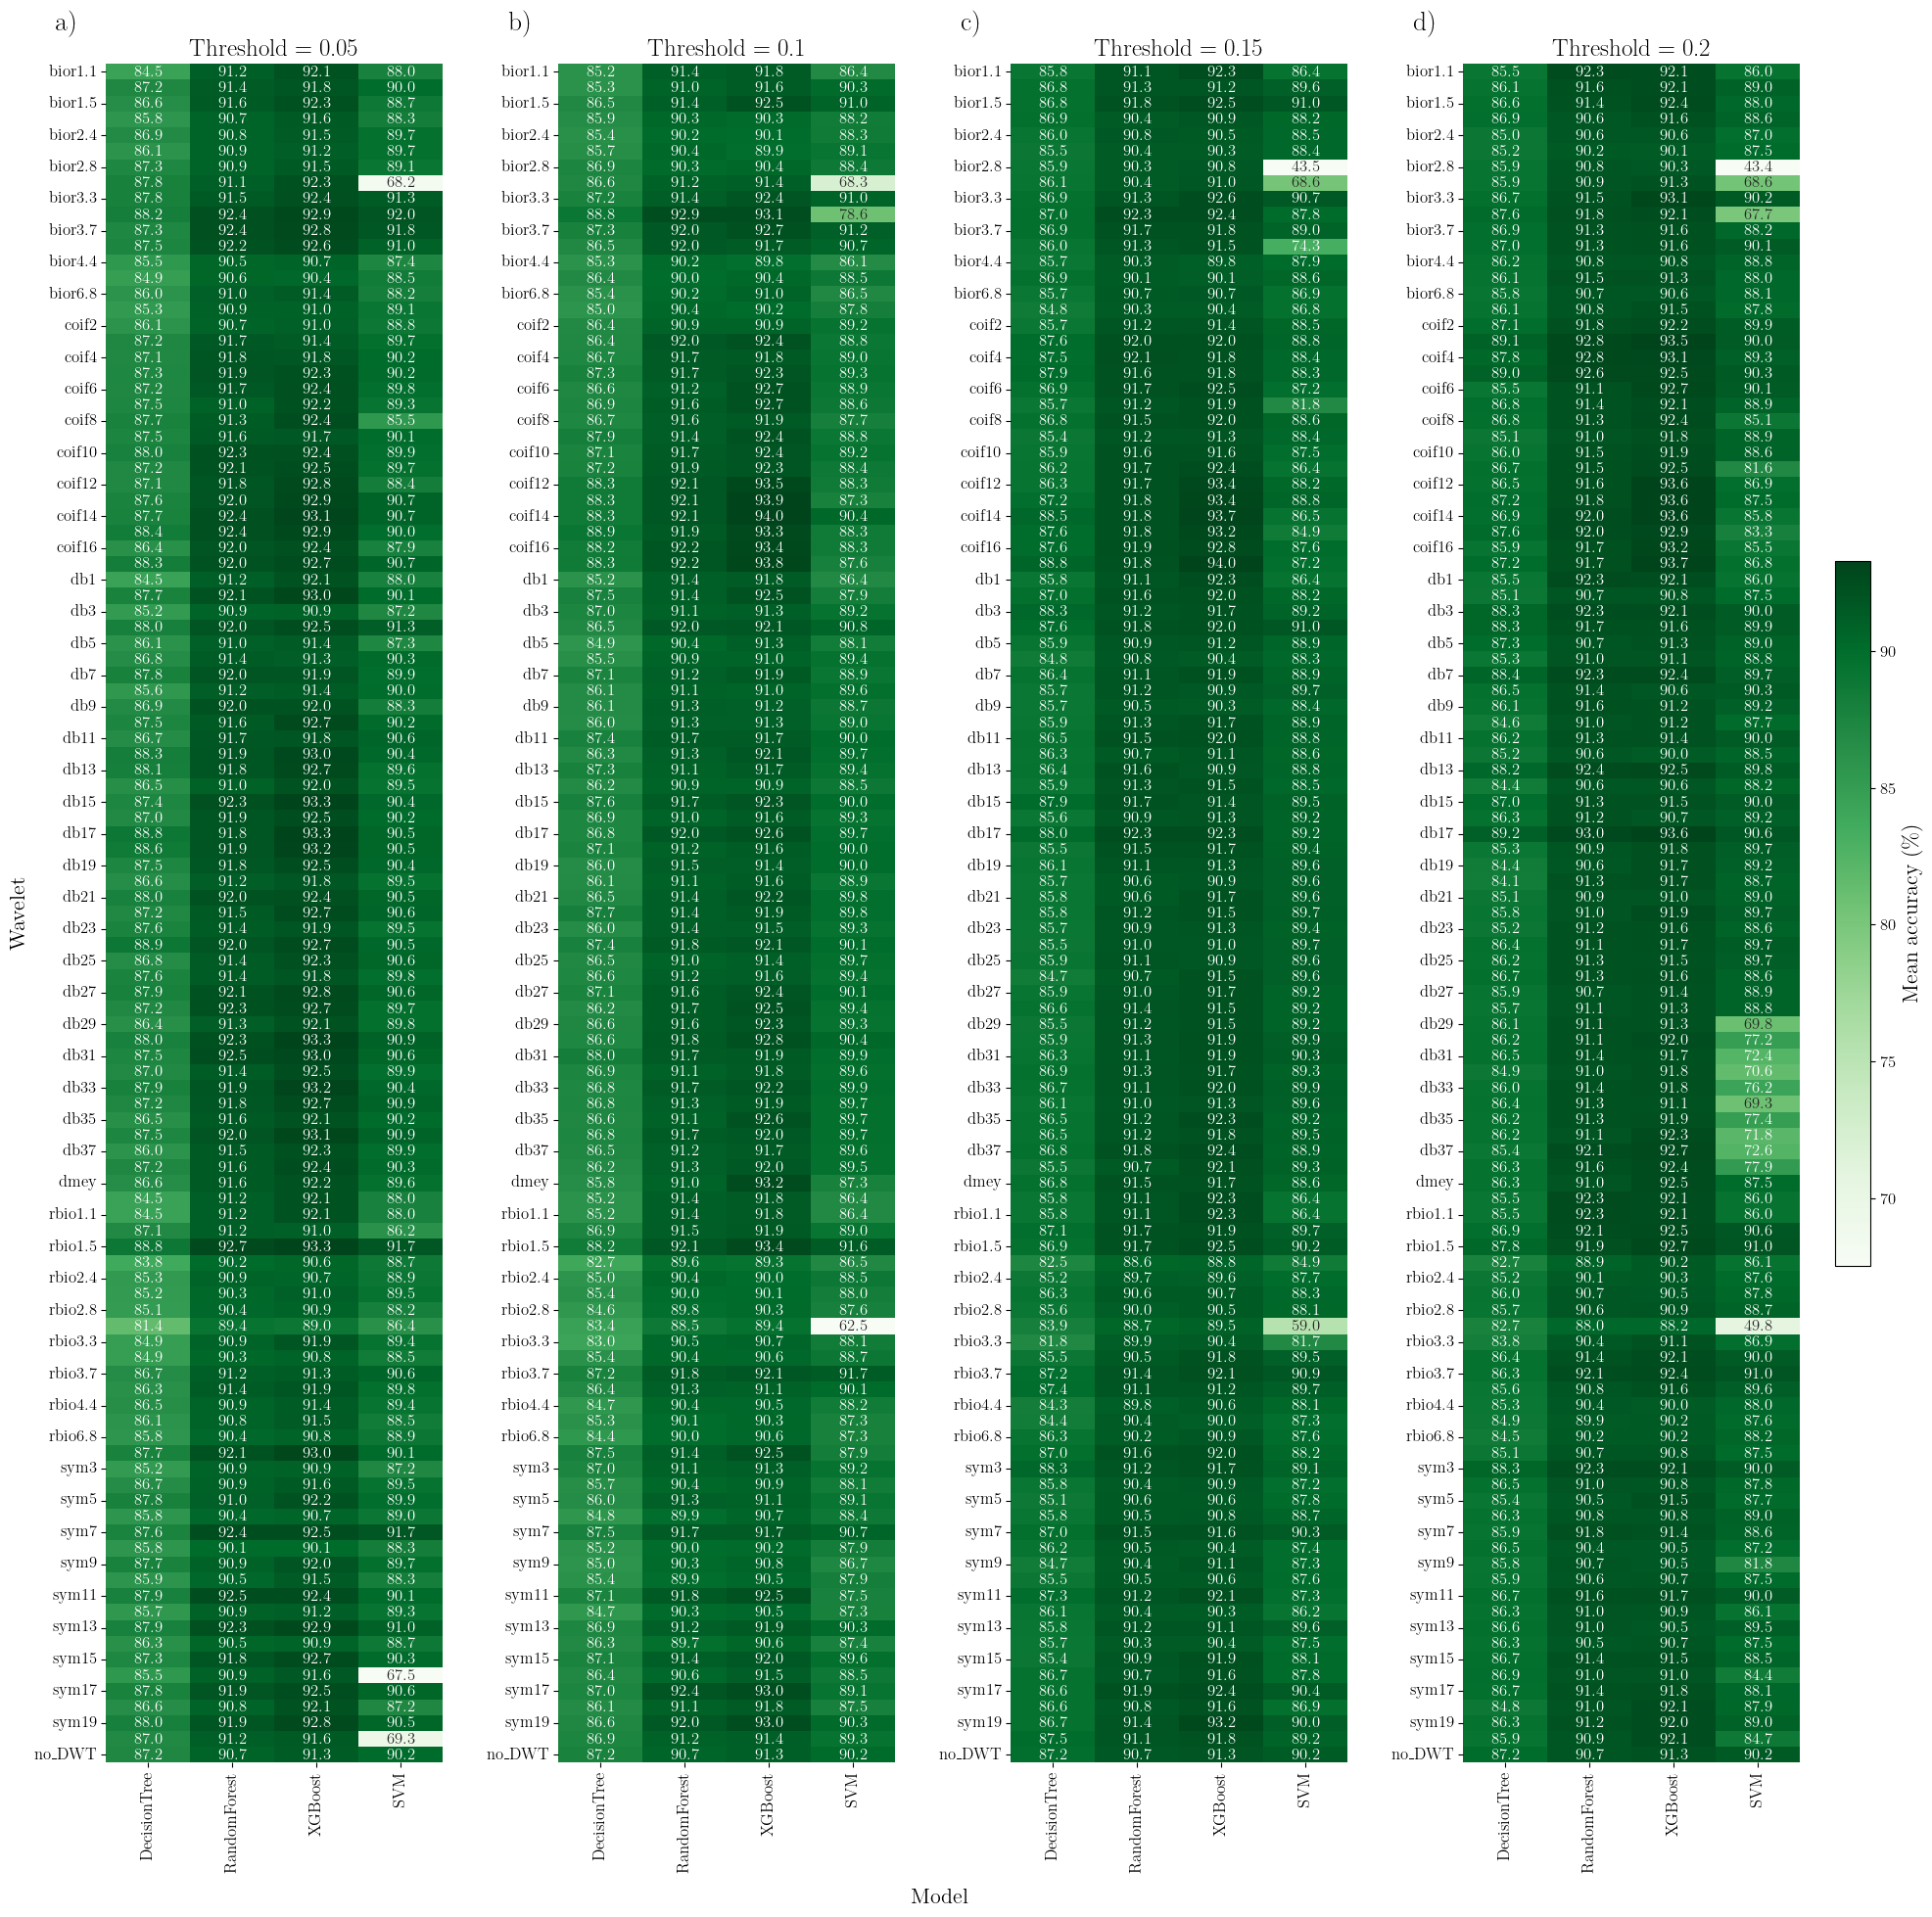

In [62]:
heatmap_accuracy_plot_many([(combined_results_thresh005_coeff2, 0.05), (combined_results_thresh01_coeff2, 0.1), (combined_results_thresh015_coeff2, 0.15), (combined_results_thresh02_coeff2, 0.2)], order = 1, filename="ML_all_wavelets_005_01_015_02")

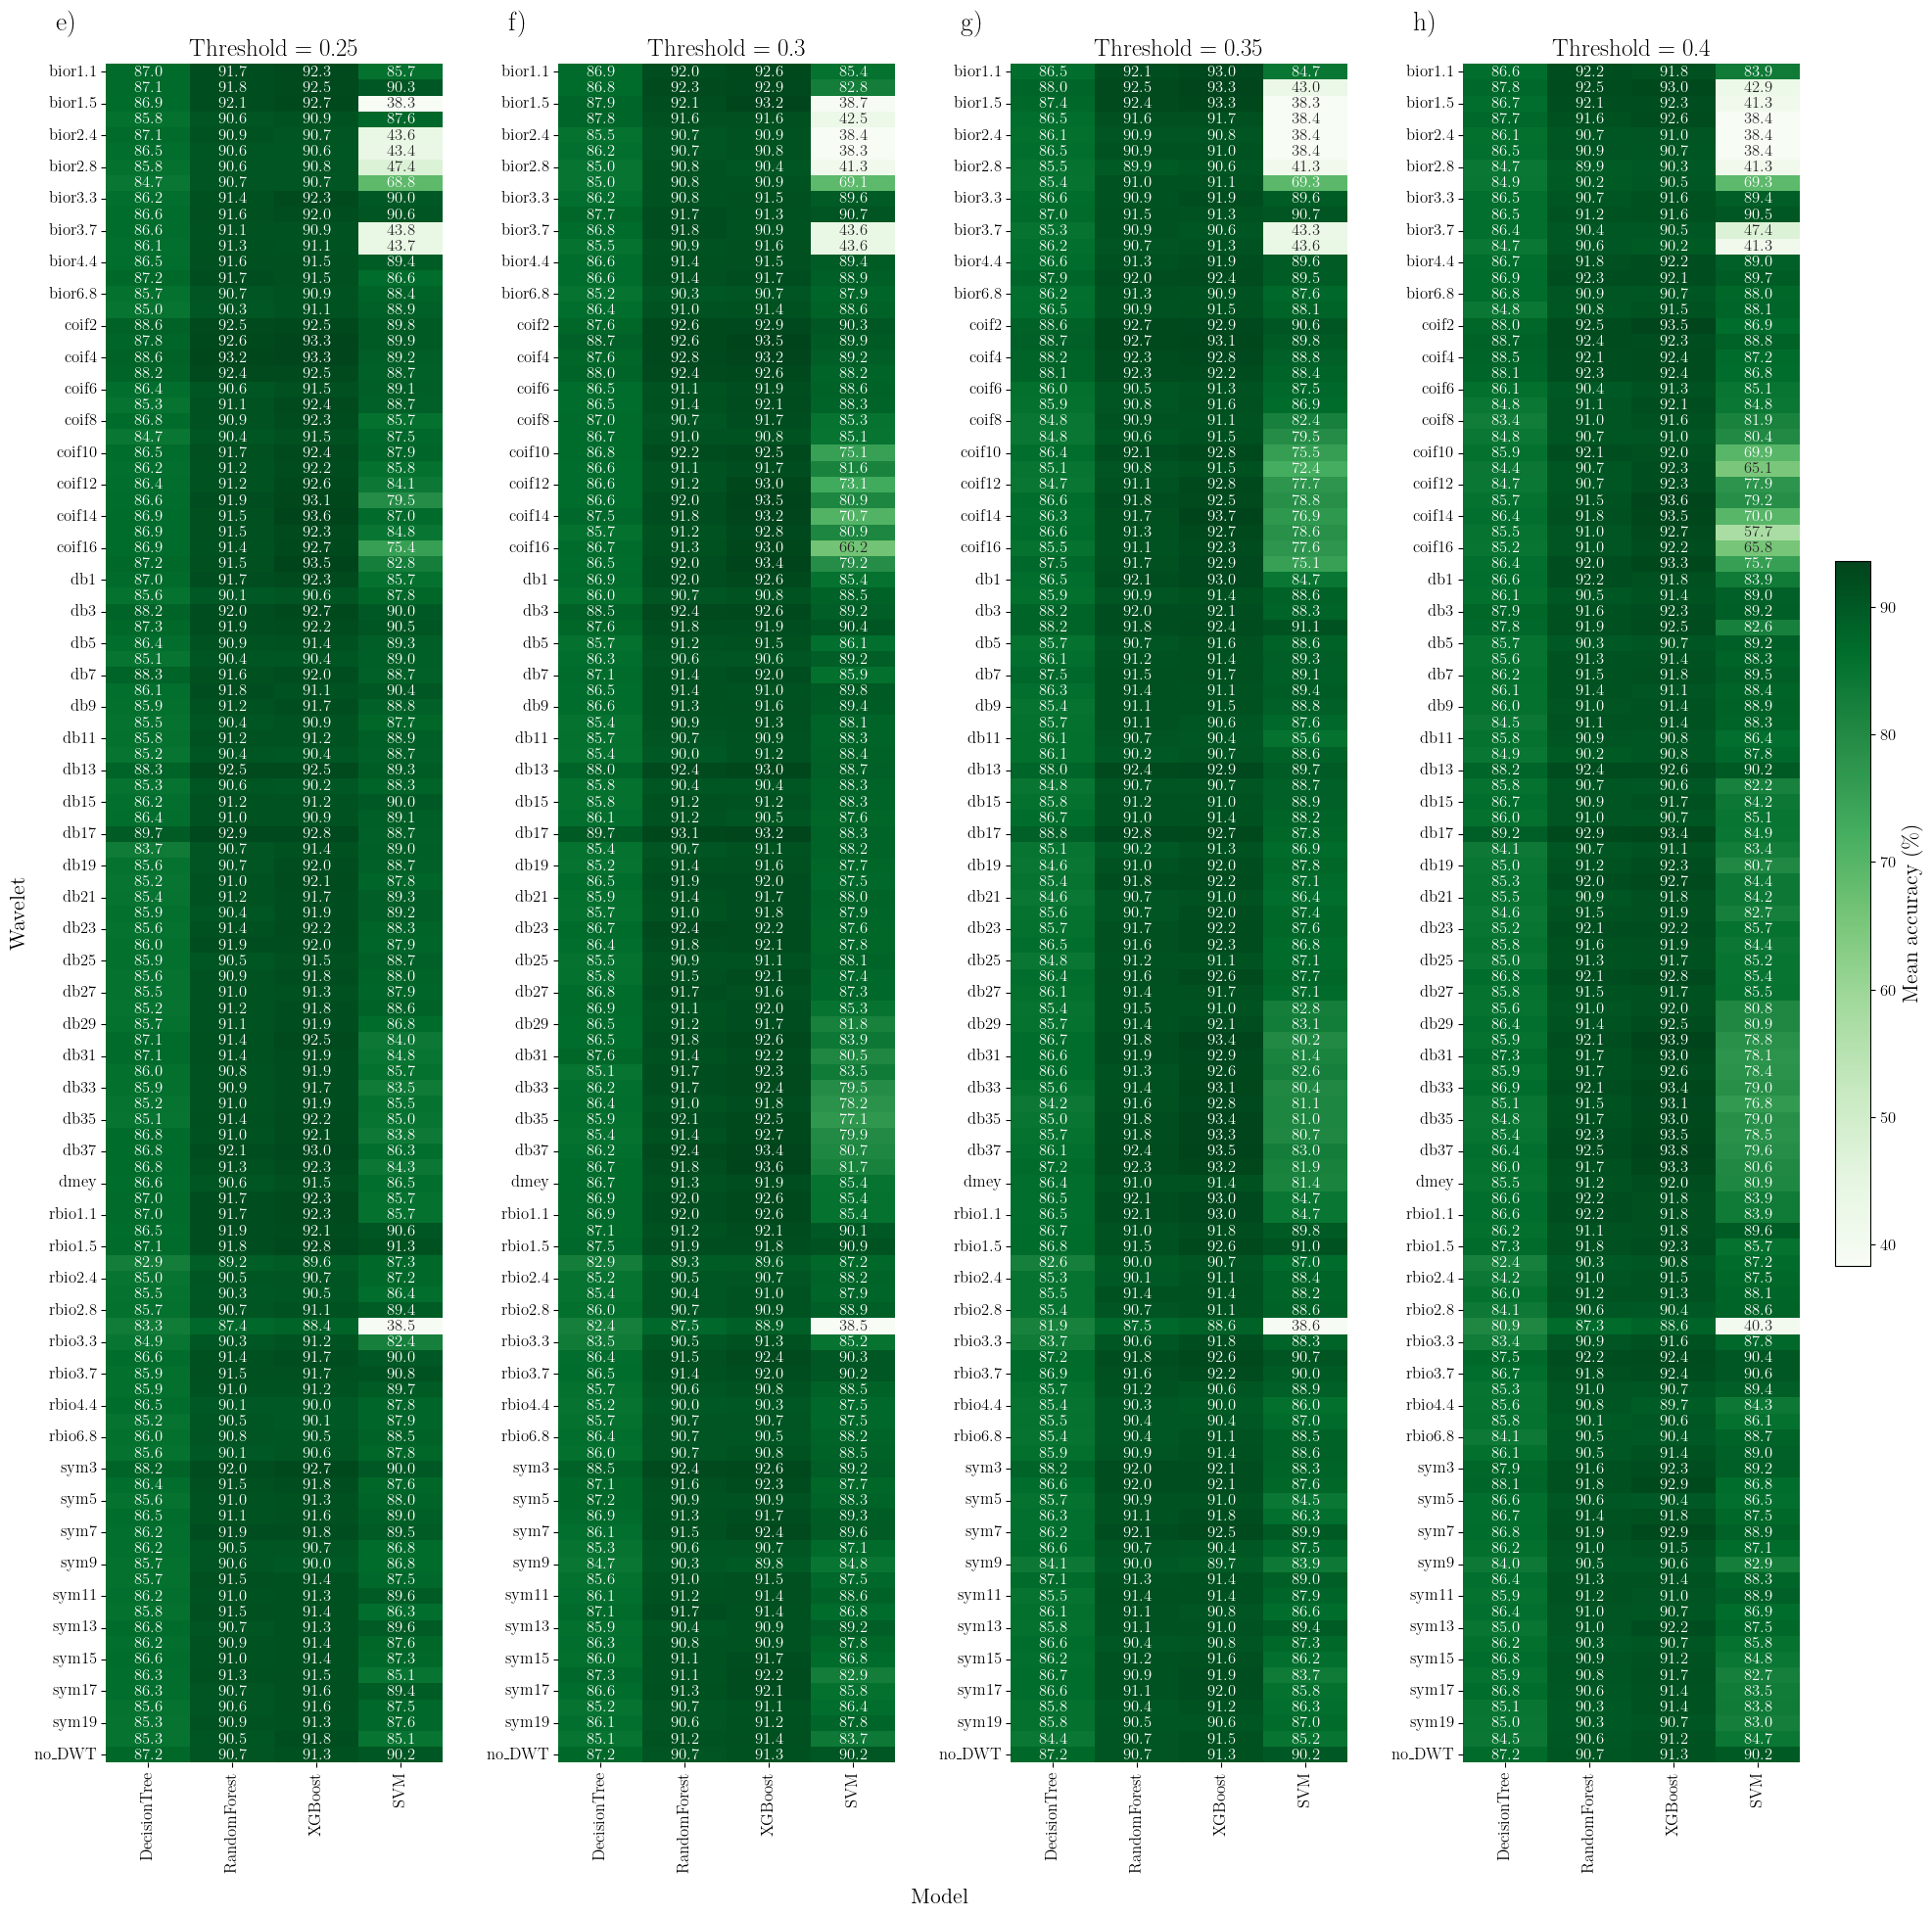

In [63]:
heatmap_accuracy_plot_many([(combined_results_thresh025_coeff2, 0.25), (combined_results_thresh03_coeff2, 0.3), (combined_results_thresh035_coeff2, 0.35), (combined_results_thresh04_coeff2, 0.4)], order = 2, filename="ML_all_wavelets_025_03_035_04")

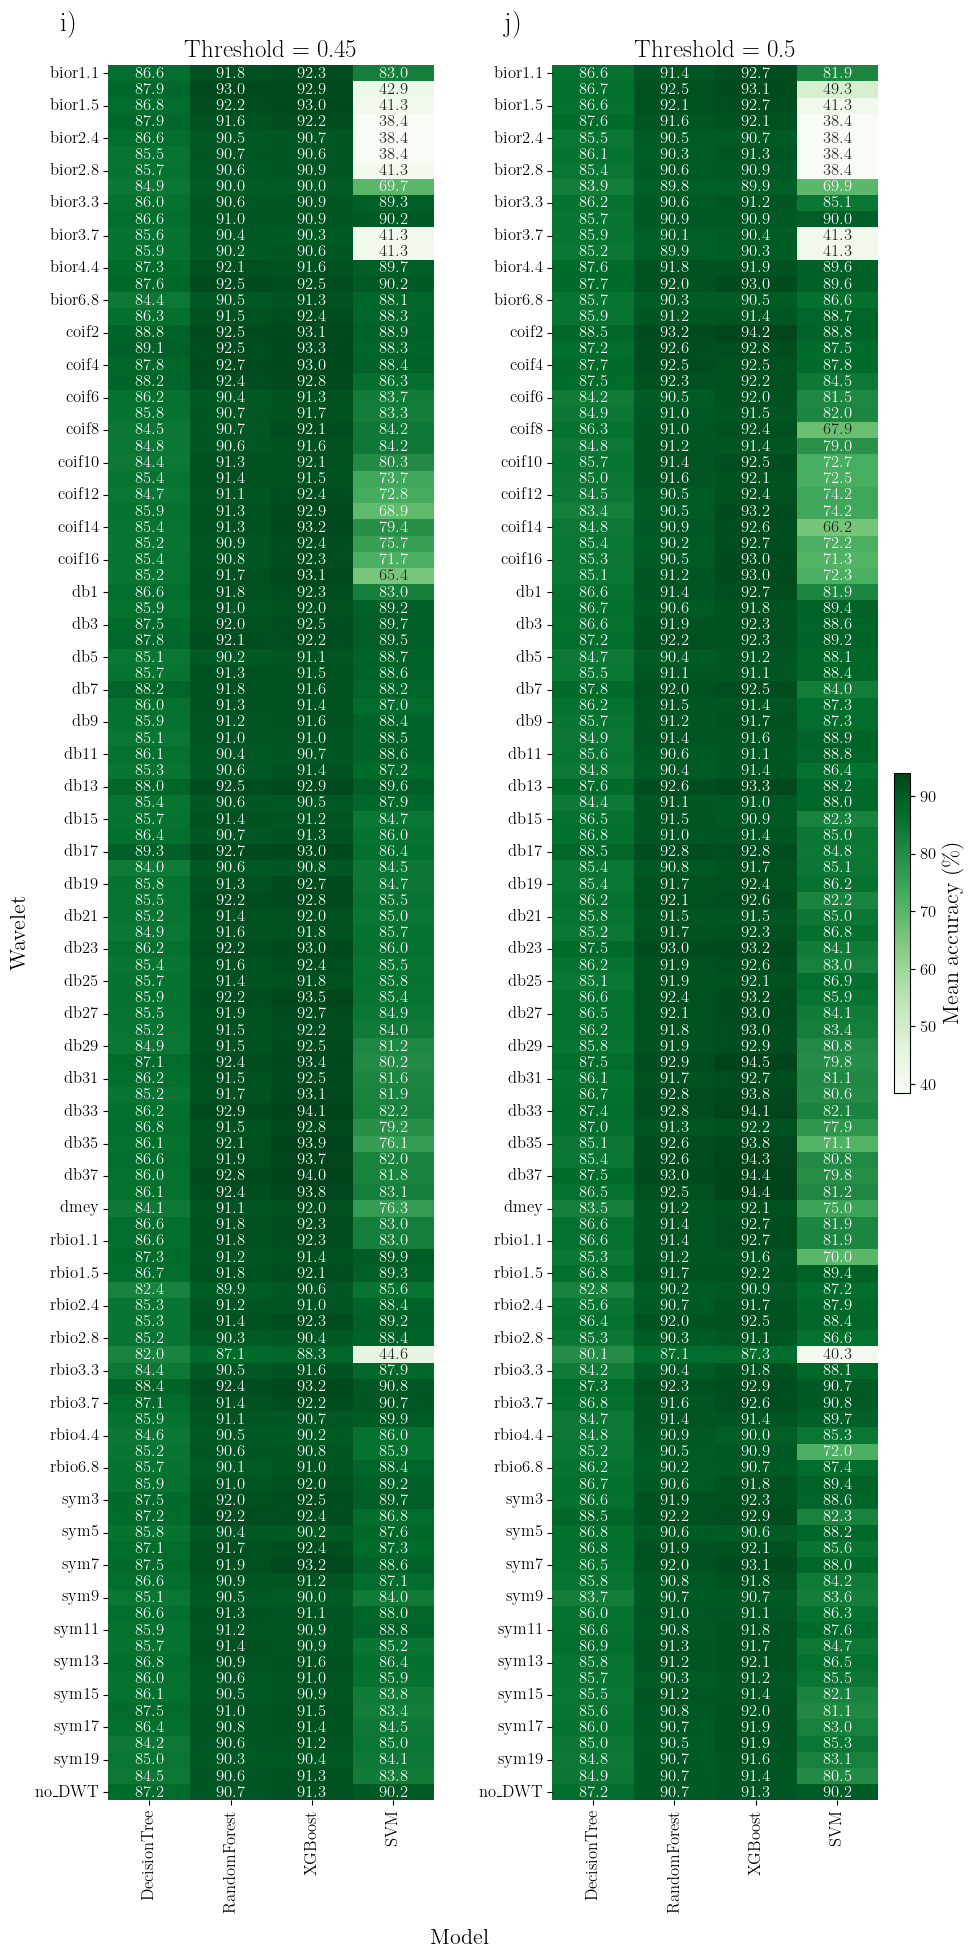

In [76]:
heatmap_accuracy_plot_many([(combined_results_thresh045_coeff2, 0.45), (combined_results_thresh05_coeff2, 0.5)], order = 3 , filename="ML_all_wavelets_045_05")

### t test

Paired t-test with Cross-Validation Results
- Low P-Value (e.g., < 0.05): Suggests that the difference in accuracies is unlikely to have occurred by chance, implying that the model's performance is significantly different from the "no_DWT" performance.

In [6]:
model_names = ['DecisionTree', 'RandomForest', 'XGBoost', 'SVM']


In [84]:
for model in model_names:
    t_statistic_test, p_value_test = stats.ttest_rel(ttest_acc[model], no_dwt_acc_ttest[model])
    print(f"Model: {model}, p-value: {p_value_test}")
    

Model: DecisionTree, p-value: 0.00027533857754336933
Model: RandomForest, p-value: 0.0019171959072167388
Model: XGBoost, p-value: 0.00039325644241466483
Model: SVM, p-value: 0.00017739062964390828


Testing coeff vs no coeff significance

In [46]:
data_coeff = [max_DT_coeff2, max_RF_coeff2, max_XGB_coeff2, max_SVM_coeff2]
data_no_coeff = [max_DT_3, max_RF_3, max_XGB_3, max_SVM_3]
# values are means so can just use means?

In [51]:
data_coeff

[array([0.8724, 0.8886, 0.889 , ..., 0.8916, 0.8927, 0.8849]),
 array([0.9074, 0.9273, 0.9292, ..., 0.9292, 0.9299, 0.9318]),
 array([0.9133, 0.9332, 0.9402, ..., 0.9391, 0.9406, 0.945 ]),
 array([0.9019, 0.92  , 0.9166, ..., 0.9063, 0.9078, 0.9078])]

In [57]:
for model_nocoeff, model_coeff in zip(data_no_coeff, data_coeff):
    t_statistic_test, p_value_test = stats.ttest_rel(model_nocoeff, model_coeff)
    print(p_value_test)


0.009767950029564923
0.000897013290478938
0.024418158252923296
0.03524455188796041
